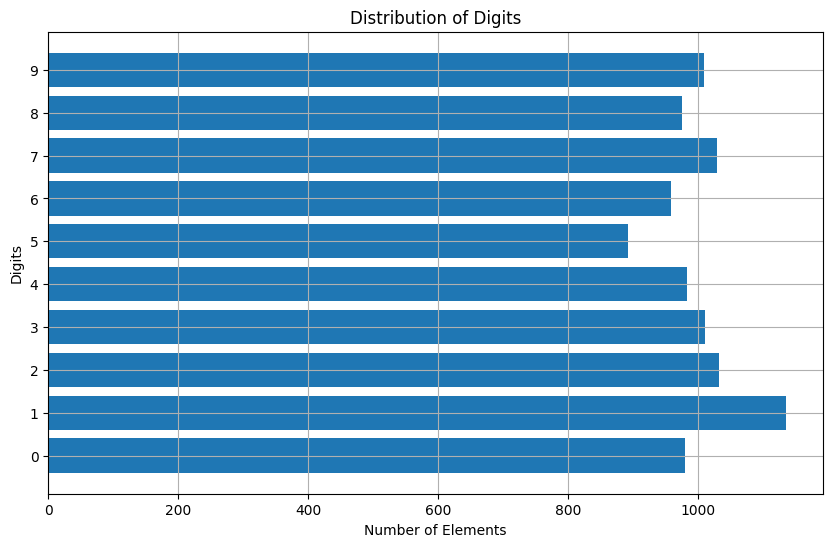

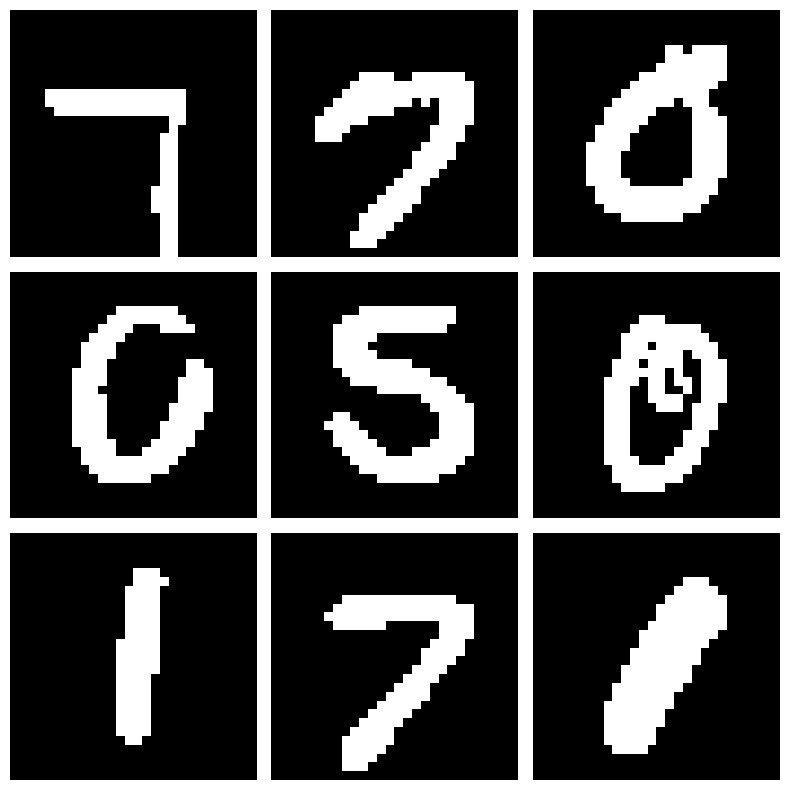

Train data shape: (8000, 28, 28, 1)
Test data shape: (2000, 28, 28, 1)


TypeError: to_categorical() got an unexpected keyword argument 'dtype'

In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load and prepare the dataset
data = pd.read_csv("mnist_test.csv").astype('float32')  # ✅ Use correct file path

# Correct label column
X = data.drop('label', axis=1)
y = data['label']

# Split into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

# Reshape flat images into 28x28
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

# Mapping digits 0–9
word_dict = {i: str(i) for i in range(10)}

# Distribution count
y_int = y.astype(int)  # ✅ FIXED: replaced np.int0
count = np.zeros(10, dtype='int')
for i in y_int:
    count[i] += 1

# Plot distribution
digits = [word_dict[i] for i in range(10)]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.barh(digits, count)
plt.xlabel("Number of Elements")
plt.ylabel("Digits")
plt.title("Distribution of Digits")
plt.grid(True)
plt.show()

# Visualize 9 sample images
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
axes = ax.flatten()
for i in range(9):
    _, img_bin = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(img_bin, cmap=plt.get_cmap('gray'))
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Reshape data for CNN input
train_X = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_X = test_x.reshape(test_x.shape[0], 28, 28, 1)

print("Train data shape:", train_X.shape)
print("Test data shape:", test_X.shape)

# One-hot encode labels
train_yOHE = to_categorical(train_y, num_classes=10, dtype='int')
test_yOHE = to_categorical(test_y, num_classes=10, dtype='int')

print("Train labels shape:", train_yOHE.shape)
print("Test labels shape:", test_yOHE.shape)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2), strides=2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), strides=2),

    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPool2D((2, 2), strides=2),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_X, train_yOHE, epochs=5, validation_data=(test_X, test_yOHE))  # You can increase epochs

# Save model
model.save('model_digits.h5')

# Show results
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Loss:", history.history['val_loss'])
print("Training Loss:", history.history['loss'])

# Predict on test images
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap=plt.get_cmap('gray'))
    pred = word_dict[np.argmax(model.predict(test_X[i].reshape(1, 28, 28, 1)))]
    ax.set_title("Prediction: " + pred)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Predict external image (optional)
try:
    img = cv2.imread('test_image.jpg')
    img_copy = img.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400, 440))

    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))
    img_final = np.reshape(img_final, (1, 28, 28, 1))

    img_pred = word_dict[np.argmax(model.predict(img_final))]

    cv2.putText(img, "Image Data", (100, 25), cv2.FONT_HERSHEY_DUPLEX, fontScale=1, thickness=2, color=(255, 0, 0))
    cv2.putText(img, "Digit Prediction: " + img_pred, (10, 410), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0, 0, 255))

    cv2.imshow('Digit Recognition', img)
    while True:
        k = cv2.waitKey(1) & 0xFF
        if k == 27:  # ESC to exit
            break
    cv2.destroyAllWindows()

except:
    print("External image 'test_image.jpg' not found or error in processing.")


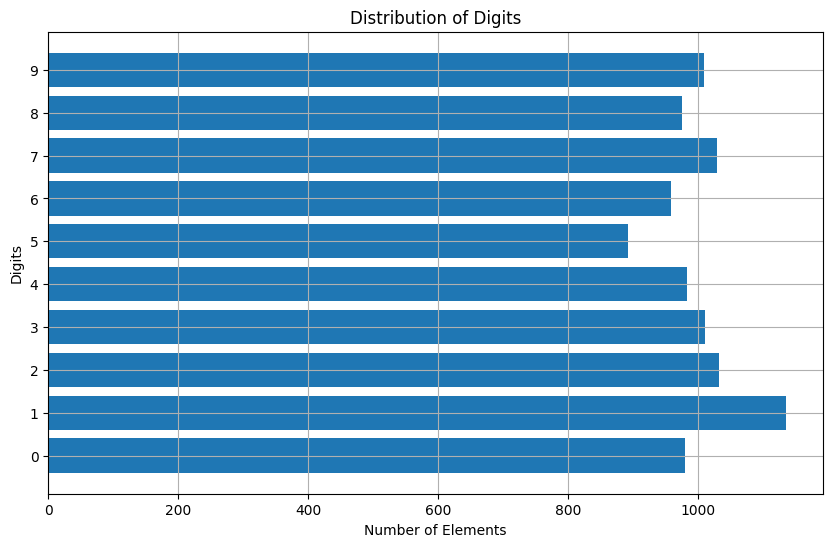

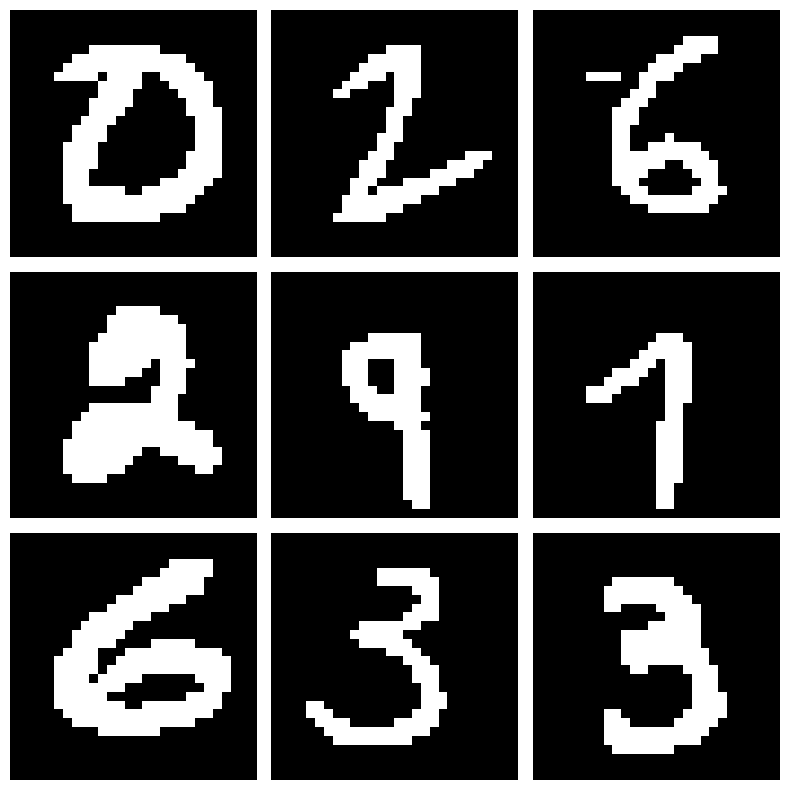

Train data shape: (8000, 28, 28, 1)
Test data shape: (2000, 28, 28, 1)
Train labels shape: (8000, 10)
Test labels shape: (2000, 10)


c:\Users\sneha sucharitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6817 - loss: 1.8880 - val_accuracy: 0.9500 - val_loss: 0.1553
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9653 - loss: 0.1114 - val_accuracy: 0.9705 - val_loss: 0.0998
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9810 - loss: 0.0564 - val_accuracy: 0.9785 - val_loss: 0.0791
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9900 - loss: 0.0298 - val_accuracy: 0.9685 - val_loss: 0.1260
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9847 - loss: 0.0407 - val_accuracy: 0.9765 - val_loss: 0.0914


Validation Accuracy: [0.949999988079071, 0.9704999923706055, 0.9785000085830688, 0.968500018119812, 0.9764999747276306]
Training Accuracy: [0.8512499928474426, 0.9668750166893005, 0.9797499775886536, 0.9826250076293945, 0.984250009059906]
Validation Loss: [0.15530605614185333, 0.09978298842906952, 0.0791349858045578, 0.12603974342346191, 0.0913955569267273]
Training Loss: [0.6552578210830688, 0.11299668252468109, 0.05767609179019928, 0.05147257447242737, 0.04619550332427025]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


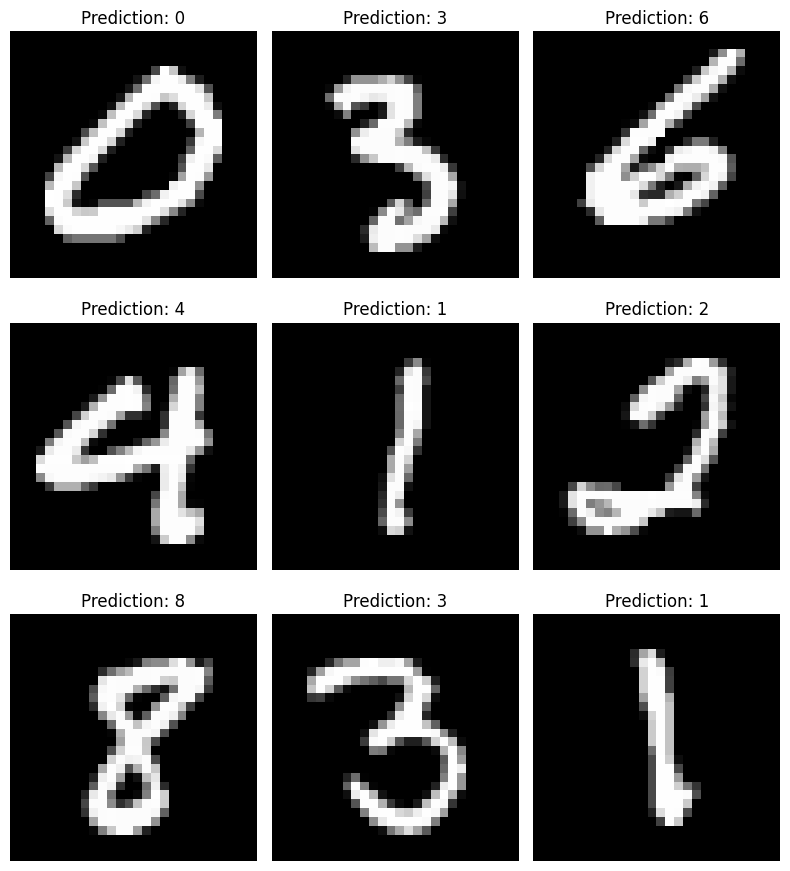

External image 'test_image.jpg' not found or error in processing.


In [8]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load and prepare the dataset
data = pd.read_csv("mnist_test.csv").astype('float32')

# Fix column reference
X = data.drop('label', axis=1)
y = data['label']

# Split dataset
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

# Reshape to 28x28
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

# Digit dictionary (0 to 9)
word_dict = {i: str(i) for i in range(10)}

# Digit distribution
y_int = y.astype(int)
count = np.zeros(10, dtype='int')
for i in y_int:
    count[i] += 1

# Plot digit distribution
digits = [word_dict[i] for i in range(10)]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.barh(digits, count)
plt.xlabel("Number of Elements")
plt.ylabel("Digits")
plt.title("Distribution of Digits")
plt.grid(True)
plt.show()

# Visualize sample images
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
axes = ax.flatten()
for i in range(9):
    _, img_bin = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(img_bin, cmap=plt.get_cmap('gray'))
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Reshape for CNN input
train_X = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_X = test_x.reshape(test_x.shape[0], 28, 28, 1)

print("Train data shape:", train_X.shape)
print("Test data shape:", test_X.shape)

# One-hot encode labels (✅ FIXED)
train_yOHE = to_categorical(train_y, num_classes=10).astype(int)
test_yOHE = to_categorical(test_y, num_classes=10).astype(int)

print("Train labels shape:", train_yOHE.shape)
print("Test labels shape:", test_yOHE.shape)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2), strides=2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), strides=2),

    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPool2D((2, 2), strides=2),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_yOHE, epochs=5, validation_data=(test_X, test_yOHE))

# Save model
model.save('model_digits.h5')

# Show results
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Loss:", history.history['val_loss'])
print("Training Loss:", history.history['loss'])

# Predict on test images
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap=plt.get_cmap('gray'))
    pred = word_dict[np.argmax(model.predict(test_X[i].reshape(1, 28, 28, 1)))]
    ax.set_title("Prediction: " + pred)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Predict external image (optional)
try:
    img = cv2.imread('test_image.jpg')
    img_copy = img.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400, 440))

    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))
    img_final = np.reshape(img_final, (1, 28, 28, 1))

    img_pred = word_dict[np.argmax(model.predict(img_final))]

    cv2.putText(img, "Image Data", (100, 25), cv2.FONT_HERSHEY_DUPLEX, fontScale=1, thickness=2, color=(255, 0, 0))
    cv2.putText(img, "Digit Prediction: " + img_pred, (10, 410), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0, 0, 255))

    cv2.imshow('Digit Recognition', img)
    while True:
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
    cv2.destroyAllWindows()

except:
    print("External image 'test_image.jpg' not found or error in processing.")
